In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv('/home/code_wizard/coding_files/machine_learning_1/Assignment_dataset.csv')
data.columns
data.head()

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,2,1,2824.802093,2530.517100,2717.842544,4
1,1,1,908.538051,1371.403348,1480.603380,2
2,1,0,4264.296027,4085.271732,4433.111426,4
3,2,1,650.809883,1537.163058,1002.764724,0
4,2,1,743.972385,1580.194147,992.426731,0


In [14]:
categorical_features=[]
continuous_features=[]
for feature in data.columns:
    if data[feature].dtype=='int32' or data[feature].dtype=='int4':
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

print(continuous_features)
print(categorical_features)  

for feature in data.columns:
    if feature in continuous_features:
        data[feature]=(data[feature]-data[feature].min())/(data[feature].max()-data[feature].min())
        
data

['Categorical_1', 'Categorical_2', 'Feature_1', 'Feature_2', 'Feature_3', 'Label']
[]


,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,1.0,1.0,0.635922,0.598592,0.569223,1.00
1,0.5,1.0,0.193404,0.318476,0.282663,0.50
2,0.5,0.0,0.968341,0.974320,0.966501,1.00
3,1.0,1.0,0.133888,0.358534,0.171990,0.00
4,1.0,1.0,0.155401,0.368933,0.169595,0.00
...,...,...,...,...,...,...
4995,0.5,0.0,0.402636,0.298745,0.384628,0.25
4996,0.0,1.0,0.630694,0.583502,0.562399,1.00
4997,0.5,1.0,0.074309,0.156388,0.148846,0.75
4998,0.5,1.0,0.568773,0.487514,0.556259,0.25


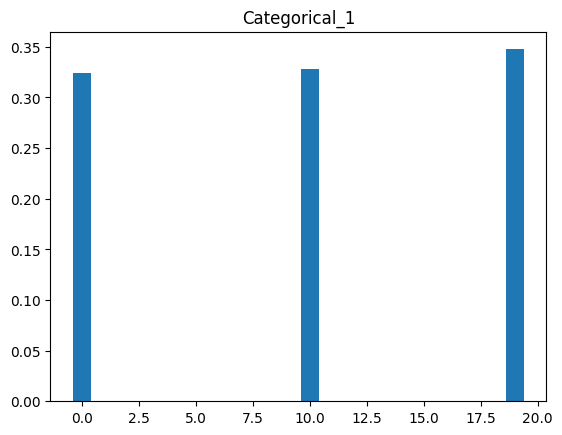

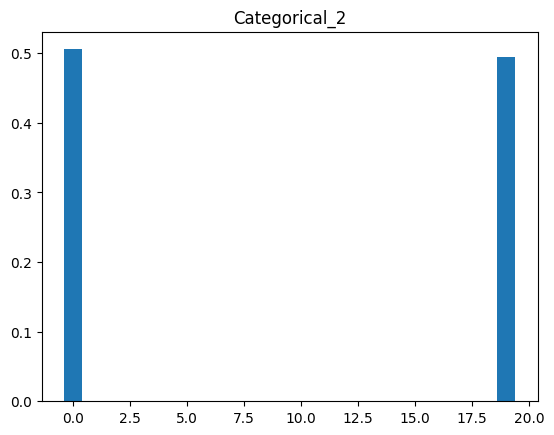

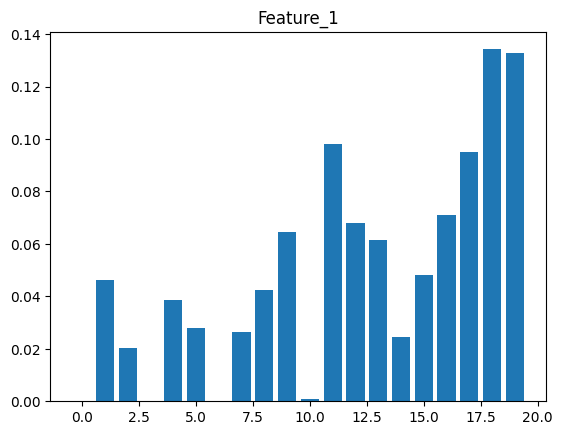

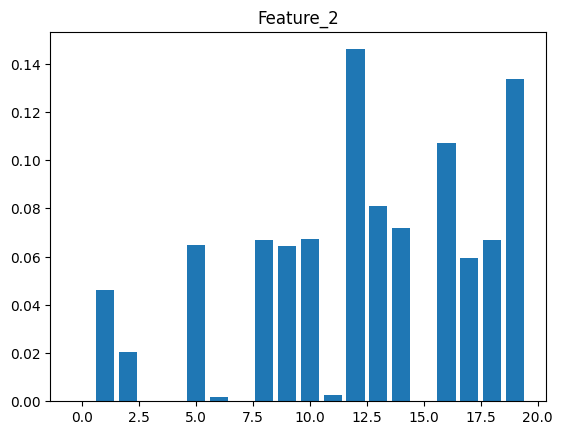

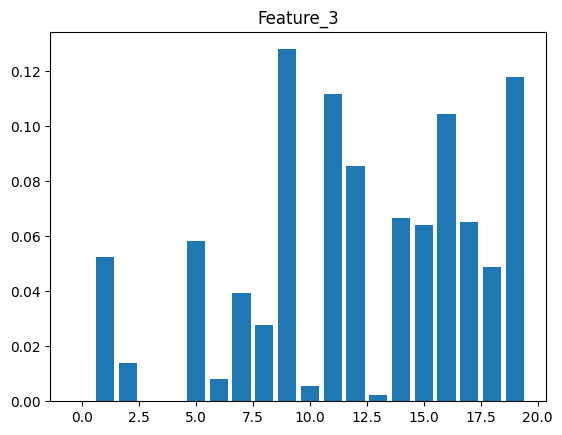

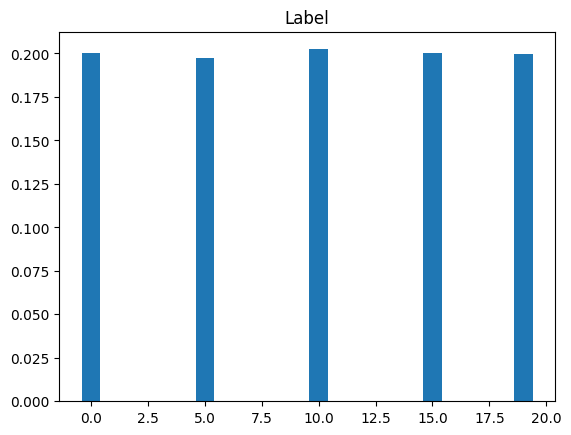

In [15]:
def bins_counts(feature):
    bins=np.linspace(data[feature].max(),data[feature].min(),20)
    bins,counts = np.unique(np.digitize(data[feature],bins),return_counts=True)
    return bins,counts/sum(counts)

for feature in continuous_features:
    bins,counts=bins_counts(feature)
    plt.bar(bins,counts)
    plt.title(feature)
    plt.show()


In [16]:
def K(x):
    const = 1/np.sqrt(2*np.pi)
    term = const*np.exp(-((x**2)/2))
    return const*term


In [17]:
def get_gaussian_likelihood(x,mu,sigma):
    const = 1/(np.sqrt(2*np.pi)*sigma)
    term = np.exp((-1/2)*((x-mu)/sigma)**2)
    return const*term

In [39]:
def KDE_likelihood(feature,bandwidth = 0.04):
    s=0
    grid = np.linspace(data[feature].max(),data[feature].min(),600)
    
    for x in data[feature]:
        s=s + K((grid-x)/bandwidth)
    return s/data[feature].size

grid = np.linspace(data[feature].max(),data[feature].min(),600)








In [19]:
def visualise_kde_vs_gaussian(feature):
    
    grid = np.linspace(data[feature].max(),data[feature].min(),600)

    kde_likelihood=KDE_likelihood(feature)
    gaussian_likelihood = get_gaussian_likelihood(grid,data[feature].mean(),data[feature].std())

    return kde_likelihood,gaussian_likelihood



/tmp/ipykernel_1396/3022146755.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


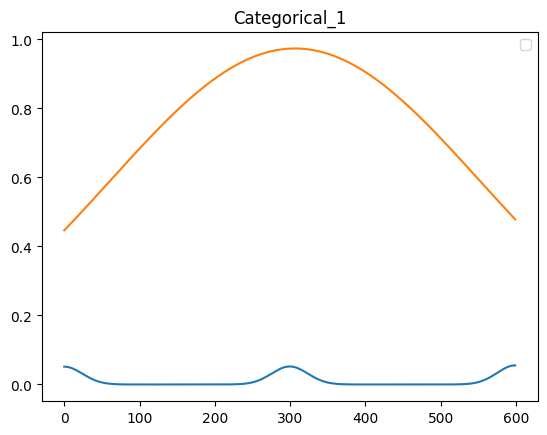

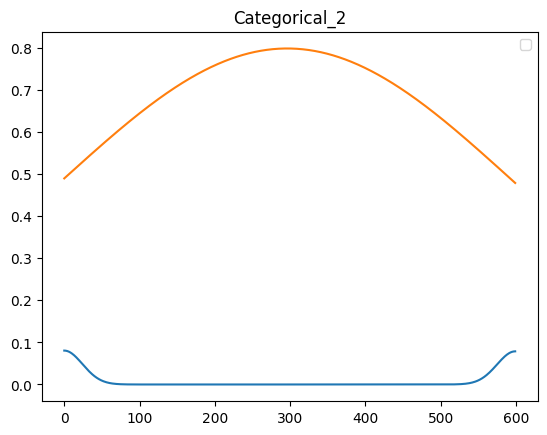

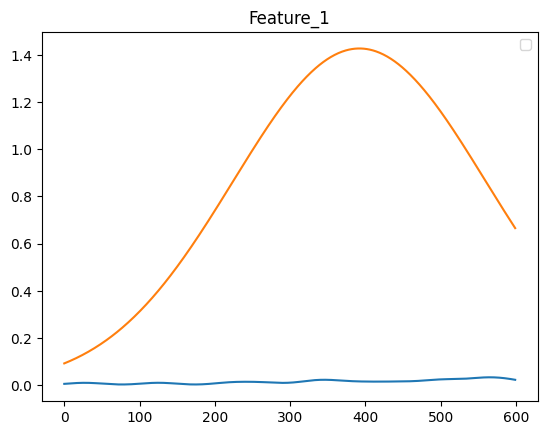

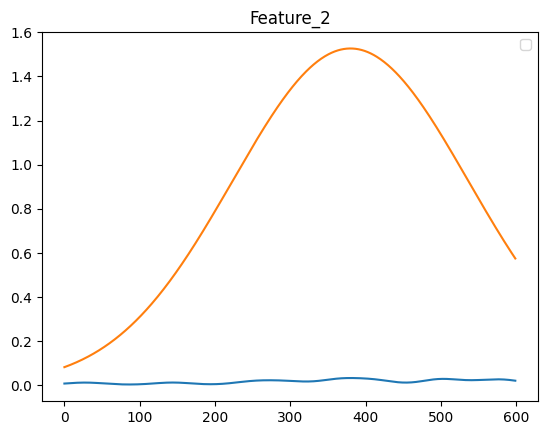

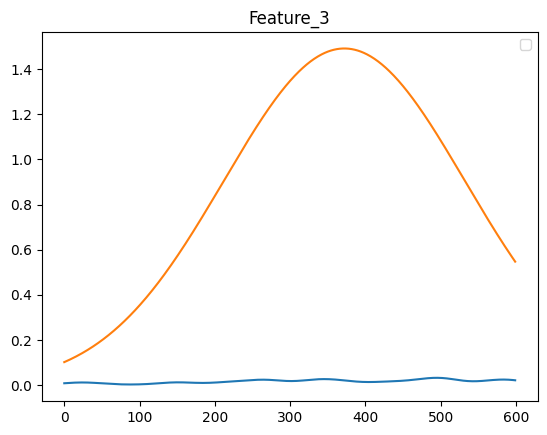

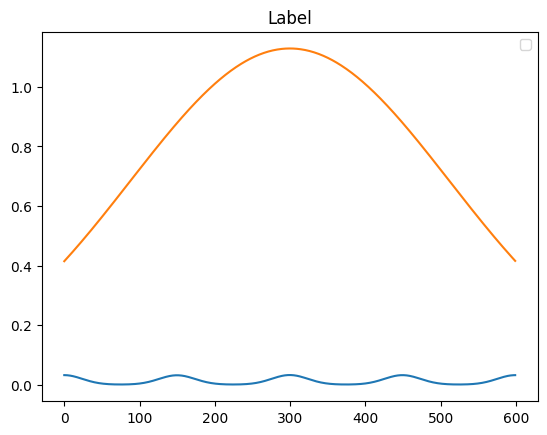

In [ ]:
for feature in data.columns:
    kde_likelihood,gaussian_likelihood = visualise_kde_vs_gaussian(feature)
    plt.plot(kde_likelihood)
    plt.plot(gaussian_likelihood)
    plt.legend()
    plt.title(feature)
    plt.show()

/tmp/ipykernel_1396/2332694312.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


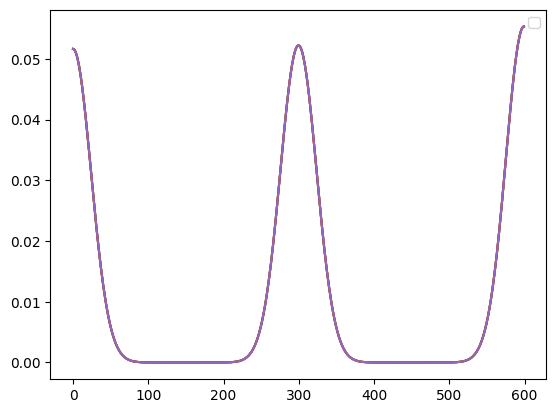

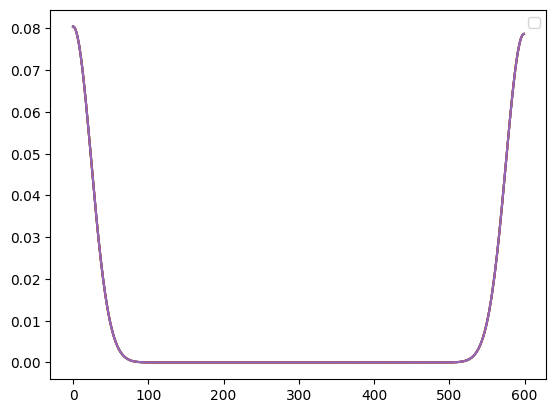

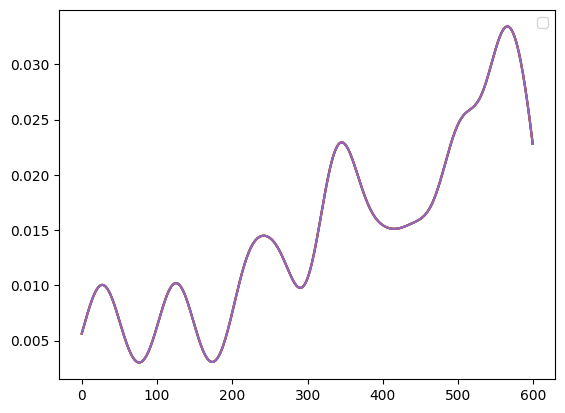

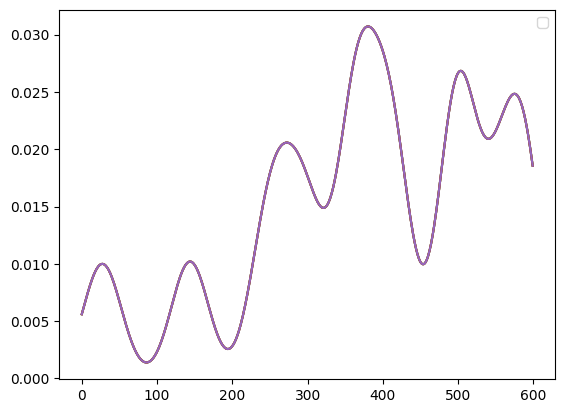

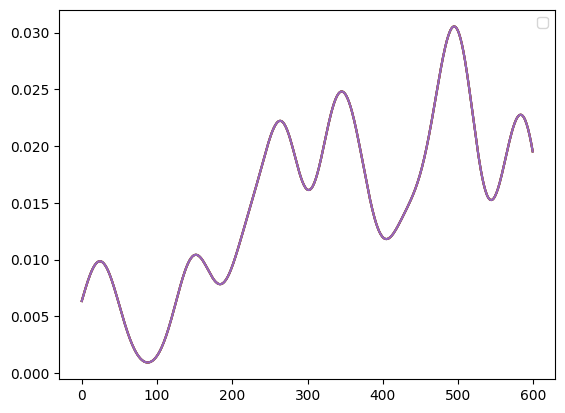

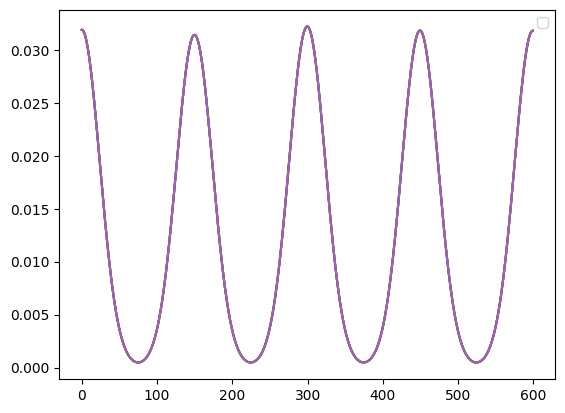

In [ ]:
classes = data['Label'].unique()
for feature in data.columns:
    for i in classes:
        dataset = data.loc[data['Label'] == i, feature]

        kde_likelihood = KDE_likelihood()
        plt.plot(kde_likelihood)

    plt.legend()  
    plt.show()


    





        





            


